In [1]:
import pandas as pd
# datasets have no missing values
df = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")
# df = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")

# datasets below have 10 columns instead of 11, doesn't have 'remaining_lease'
# df = pd.read_csv("resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")
# df = pd.read_csv("resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")
# df = pd.read_csv("resale-flat-prices-based-on-approval-date-1990-1999.csv")

In [2]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
75468,2020-07,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,66 years 03 months,575000.0
75469,2020-07,YISHUN,EXECUTIVE,614,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,65 years 10 months,568888.0
75470,2020-07,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,66 years 02 months,540000.0
75471,2020-07,YISHUN,EXECUTIVE,724,YISHUN ST 71,04 TO 06,145.0,Apartment,1986,65 years,535000.0


In [3]:
df['resale_price'].describe()

count    7.547300e+04
mean     4.383401e+05
std      1.533255e+05
min      1.400000e+05
25%      3.280000e+05
50%      4.080000e+05
75%      5.120000e+05
max      1.232000e+06
Name: resale_price, dtype: float64

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
import lightgbm as lgb
# install lightgbm that is compatible for win64
from scipy.stats.stats import pearsonr
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
# import xgboost as xgb
# import libxgboost as lxgb
# able to install libxgboost (compatible for win64) but unable to import


 mu = 438340.14 and sigma = 153324.50



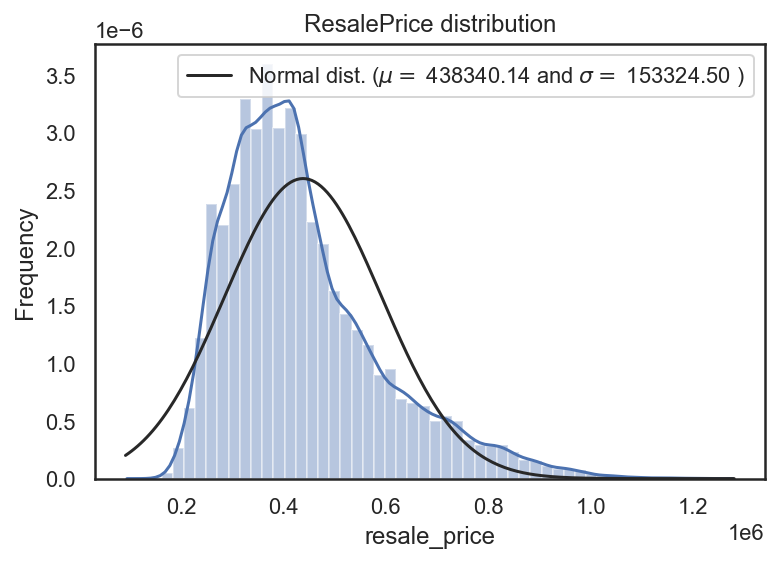

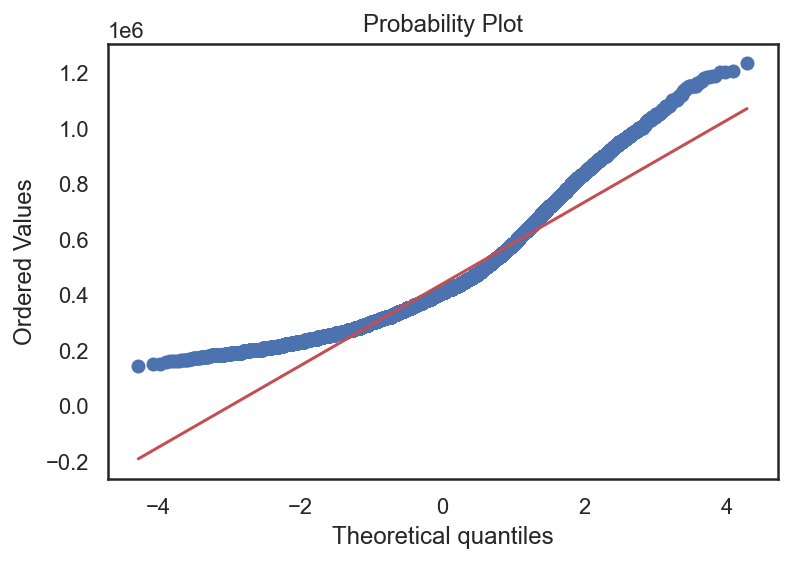

Skewness: 1.130373
Kurtosis: 1.293406


In [5]:
import seaborn as sns
sns.distplot(df['resale_price'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['resale_price'])
# mu refers to mean
# sigma refers to standard deviation
# https://www.quora.com/How-do-you-explain-mu-and-sigma-in-statistics-to-a-layman#:~:text=Mu%20is%20the%20arithmetic%20mean,sigma%20to%20mu%2B2*sigma

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ResalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['resale_price'], plot=plt)
plt.show()

print("Skewness: %f" % df['resale_price'].skew())
print("Kurtosis: %f" % df['resale_price'].kurt())

# Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. 
# That is, data sets with high kurtosis tend to have heavy tails, or outliers. 
# Data sets with low kurtosis tend to have light tails, or lack of outliers. 
# A uniform distribution would be the extreme case.

In [6]:
# multivariate analysis
# checking categorical data
df.select_dtypes(include=['object']).columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'remaining_lease'],
      dtype='object')

In [7]:
#Checking numerical data
df.select_dtypes(include=['int64','float64']).columns

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price'], dtype='object')

In [8]:
# Total number of features
cat = len(df.select_dtypes(include=['object']).columns)
num = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+', num, 'numerical', '=', cat+num, 'features')

Total Features:  8 categorical + 3 numerical = 11 features


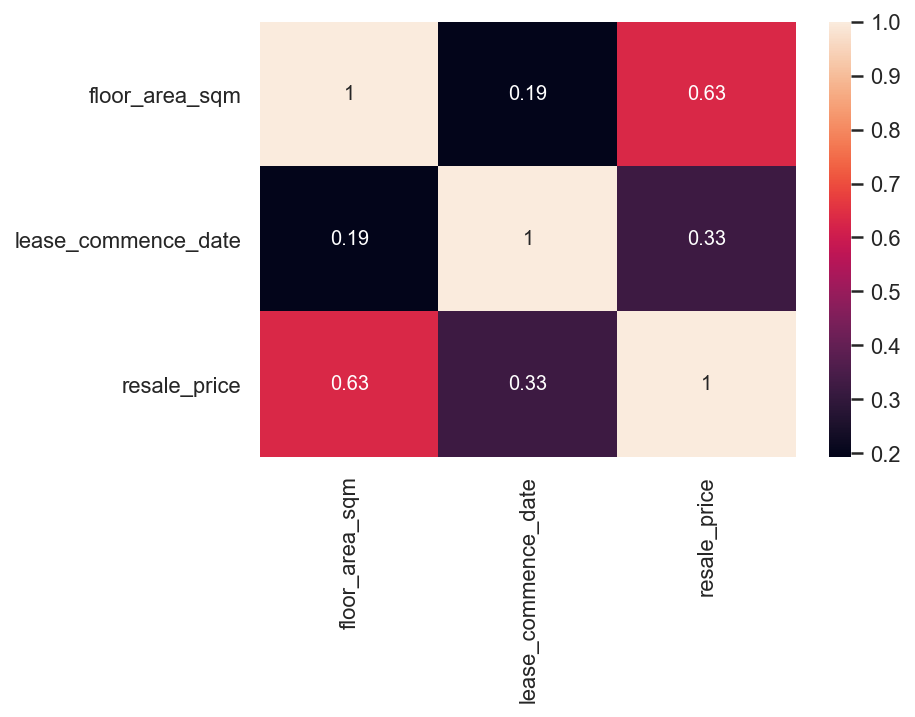

In [9]:
# Correlation Matrix Heatmap
corrmat = df.corr()
sns.heatmap(corrmat, annot=True);

In [10]:
# Ranking the correlated features
cols = corrmat.nlargest(3, 'resale_price')['resale_price'].index
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,resale_price
1,floor_area_sqm
2,lease_commence_date


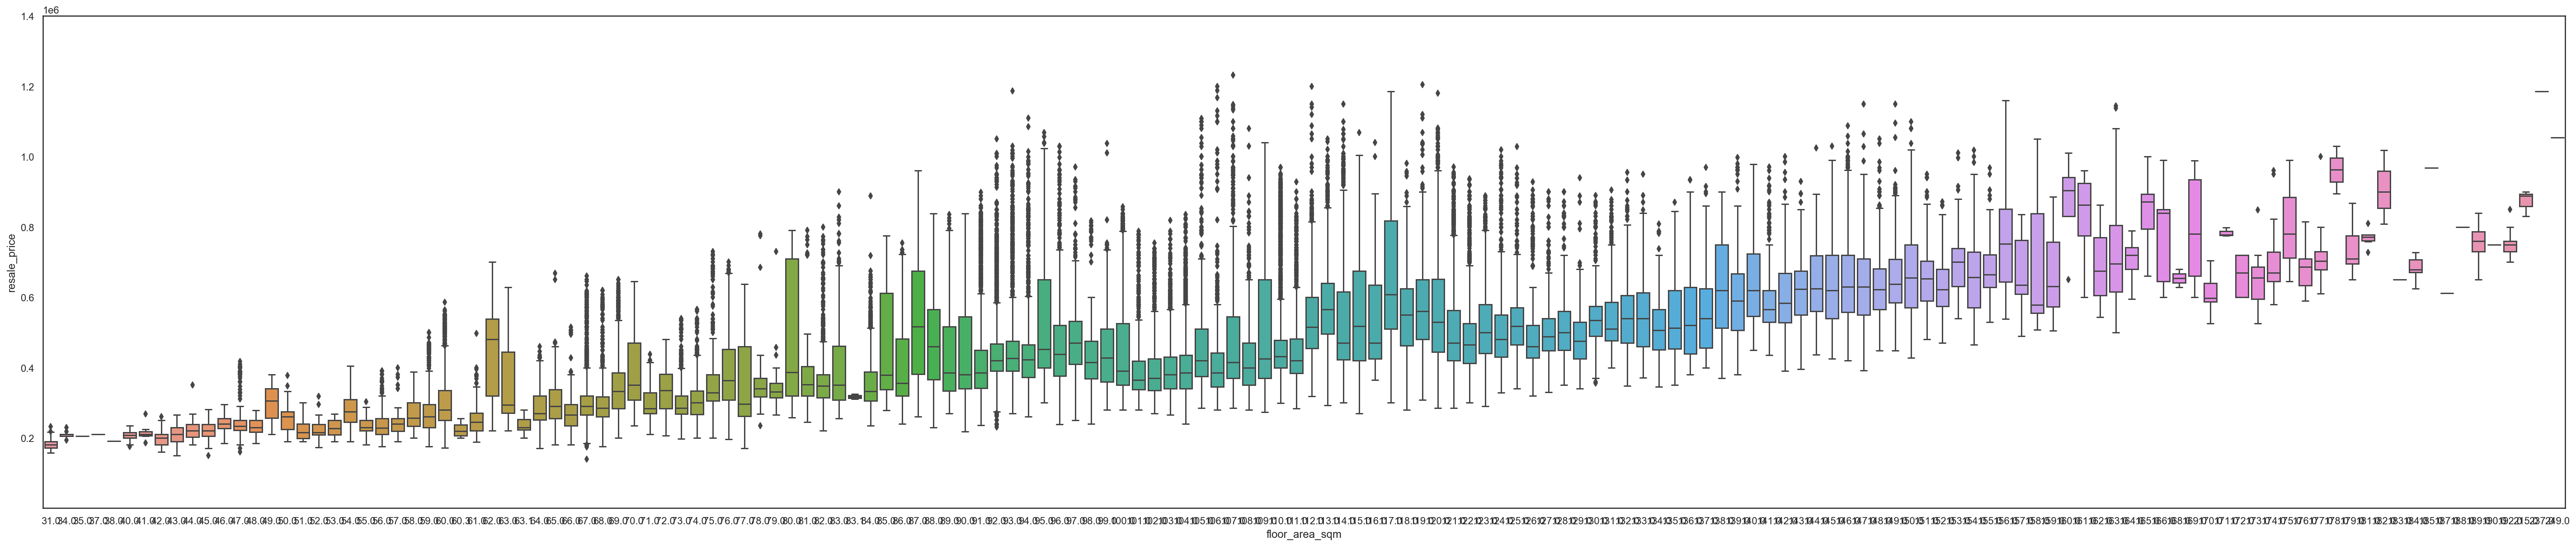

In [11]:
# floor_area_sqm vs resale_price using box plot
var = 'floor_area_sqm'
data = pd.concat([df['resale_price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(50, 10))
fig = sns.boxplot(x=var, y="resale_price", data=data)
fig.axis(ymin=1000, ymax=1400000);
# positive correlation: higher price for larger floor area

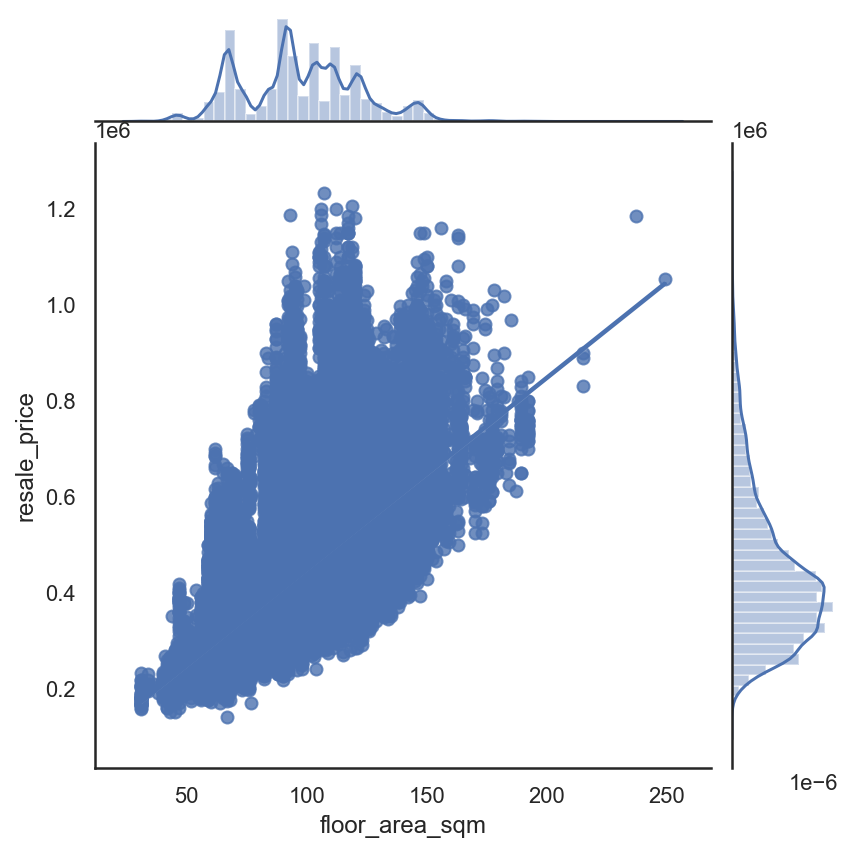

In [12]:
# floor_area_sqm vs resale_price using joint plot
sns.jointplot(x=df['floor_area_sqm'], y=df['resale_price'], kind='reg')
# cannot see pearson r score
# no need to remove any outlier here i think

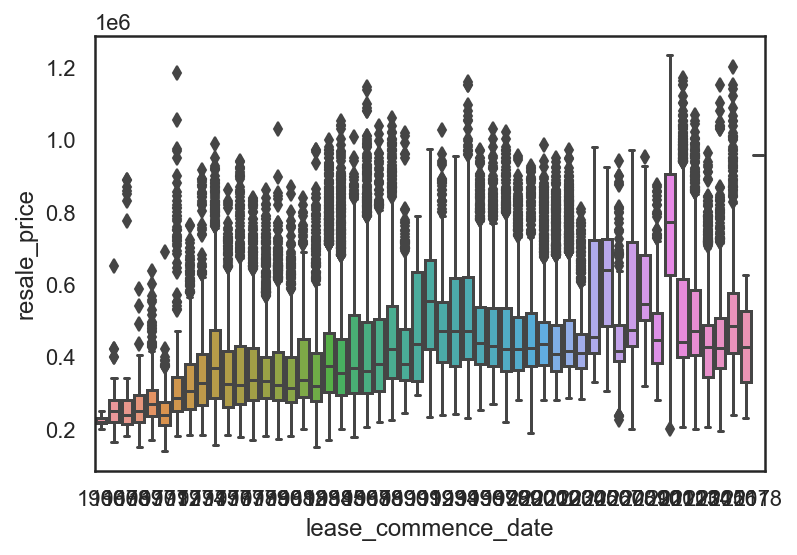

In [13]:
# lease_commence_date vs resale_price using boxplot
sns.boxplot(x=df['lease_commence_date'], y=df['resale_price'])
# increasing through the years? thinking it is more of a categorical variable than numerical?

In [14]:
# Check if there are any missing values in the dataset
y_train = df.resale_price.values
all_data = df.reset_index(drop=True)
all_data.drop(['resale_price'], axis=1, inplace=True)
print("Train data size is : {}".format(df.shape))
print("New dataset size is : {}".format(all_data.shape))
all_data.isnull().sum()
# no missing data

# Find Missing Ratio of Dataset
# all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
# all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
# missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
# missing_data
# skip because already know there are no missing values

Train data size is : (75473, 11)
New dataset size is : (75473, 10)


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
dtype: int64


 mu = 12.94 and sigma = 0.33



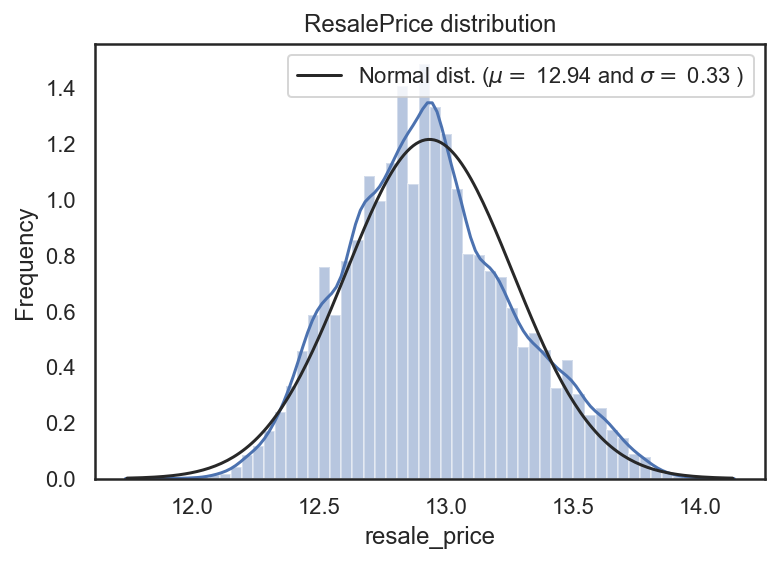

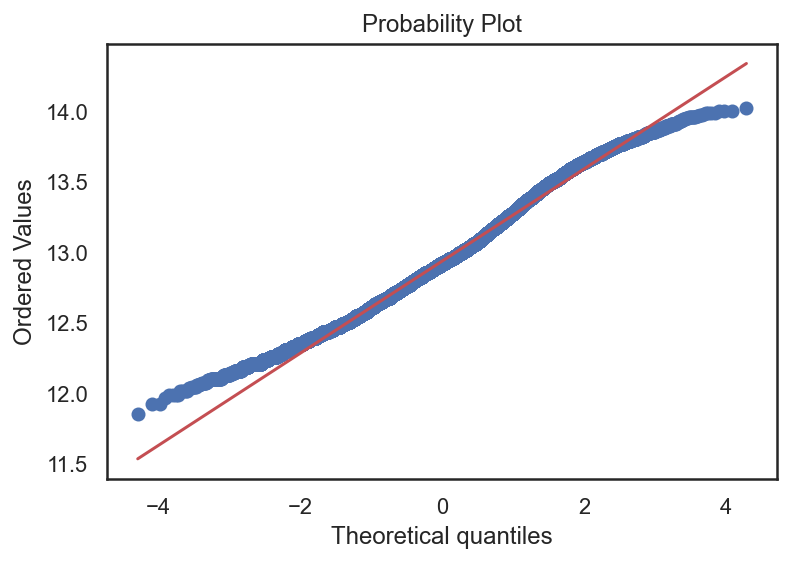

Skewness: 0.281599
Kurtosis: -0.253019


In [15]:
# Fixing skewed features
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["resale_price"] = np.log1p(df["resale_price"])
# use log1p instead of log because more accurate for smaller numbers of x i think, but shouldn't be an issue in this case
# https://stackoverflow.com/questions/49538185/what-is-the-purpose-of-numpy-log1p

#Check the new distribution 
sns.distplot(df["resale_price"], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df["resale_price"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ResalePrice distribution')

fig = plt.figure()
res = stats.probplot(df["resale_price"], plot=plt)
plt.show()

y_train = df.resale_price.values

print("Skewness: %f" % df["resale_price"].skew())
print("Kurtosis: %f" % df["resale_price"].kurt())
# decreased as compared to the first plot

In [16]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
floor_area_sqm,0.249729
lease_commence_date,0.104199


In [17]:
# Apply box cox on skewed numerical features
skewness = skewness[abs(skewness) > 0.75]
# doesn't this mean to take only features with values more than 0.75? above values < 0.75 but it still indicate those values

print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.special import boxcox1p
# A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. 
# https://www.statisticshowto.com/box-cox-transformation/#:~:text=A%20Box%20Cox%20transformation%20is,a%20broader%20number%20of%20tests.

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    all_data[feat] += 1

There are 2 skewed numerical features to Box Cox transform


In [18]:
all_data = pd.get_dummies(all_data)
# get_dummies convert categorical variable into dummy/indicator variables e.g. flat_model_Simplified with 0s and 1s
# https://www.w3resource.com/pandas/get_dummies.php

print(all_data.shape)
# all_data.head()

(75473, 3712)


In [19]:
# Adjust here to test the models, set to 100 rows out of 70k to see if it is working
train = all_data[:5000]
test = all_data[5001:10000]
y_train = y_train[:5000]
# train and y_train numbers need to be the same to be compatible

In [20]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
# Cross-validation with k-folds
n_folds = 5

# Function to obtain root mean squared log error (RMSLE) of selected model
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    # Returns the number of splitting iterations in the cross-validator
    # X = all_data.values (all values from df without resale_prices)
    
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    # Models are defined below: lasso, enet, krr...
    # X = train.values (values from df without resale_price)
    # y = y_train.values, resale_prices only. what we are trying to predict.
    
    return(rmse)
    # Returns an array of scores of the estimator for each run of the cross validation.

In [22]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

# unable to use xgboost model 
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
#                              learning_rate=0.05, max_depth=6, 
#                              min_child_weight=1.5, n_estimators=7200,
#                              reg_alpha=0.9, reg_lambda=0.6,
#                              subsample=0.2,seed=42, silent=1,
#                              random_state =7)

In [23]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
# prints mean and standard deviation of root mean squared error score

# unable to use xgboost model 
# score = rmsle_cv(model_xgb)
# print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1064 (0.0043)

ElasticNet score: 0.1053 (0.0043)

Kernel Ridge score: 0.1849 (0.0111)

Gradient Boosting score: 0.1000 (0.0067)

LGBM score: 0.0936 (0.0042)



In [24]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [25]:
# Average ENet, GBoost, KRR, and lasso. Add in LightGBM later
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Averaged base models score: 0.1114 (0.0061)



In [26]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(clf)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [27]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.0987 (0.0049)


In [28]:
# returns root mean squared log error (RMSLE)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [29]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
# unsure why stacked_pred not used

print(rmsle(y_train, stacked_train_pred))

0.0857503188320518


In [30]:
# unable to use xgboost model
# model_xgb.fit(train, y_train)
# xgb_train_pred = model_xgb.predict(train)
# xgb_pred = np.expm1(model_xgb.predict(test))
# print(rmsle(y_train, xgb_train_pred))

In [31]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
# unsure why lgb_pred not used

print(rmsle(y_train, lgb_train_pred))

0.08412434377290869


In [32]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 + lgb_train_pred*0.20 ))

# print(rmsle(y_train,stacked_train_pred*0.70 + xgb_train_pred*0.10 + lgb_train_pred*0.20 ))
# omitted xgb training prediction because did not use the model

# interpreting RMSE/RMSLE score
# https://stats.stackexchange.com/questions/56302/what-are-good-rmse-values

RMSLE score on train data:
1.2970894723358157
